# Import Dependencies

In [1]:
# visualizations
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline 

# Read in Dataset

In [2]:
df = pd.read_csv("DataSource/master_w_encoded_genres.csv", index_col=0)
df.head()

acousticness  danceability    duration_ms    energy  instrumentalness  \
0      0.575083      0.442750  247260.000000  0.386336          0.022717   
1      0.176934      0.664788  218165.257576  0.685136          0.000046   
2      0.176934      0.664788  218165.257576  0.685136          0.000046   
3      0.176934      0.664788  218165.257576  0.685136          0.000046   
4      0.547000      0.750125  152929.500000  0.519750          0.043137   

   liveness   loudness  speechiness       tempo   valence  ...  electronic  \
0  0.287708 -14.205417     0.180675  115.983500  0.334433  ...           0   
1  0.162139  -9.877909     0.082392  132.495091  0.754409  ...           0   
2  0.162139  -9.877909     0.082392  132.495091  0.754409  ...           0   
3  0.162139  -9.877909     0.082392  132.495091  0.754409  ...           0   
4  0.213975  -8.878500     0.276725  114.229125  0.319500  ...           0   

   indie  jazz  latin  pop  r&b  rap  rock  show tunes  worship  
0      0     0      0    0    0    0     0           1        0  
1      0     0      0    1    0    0     0           0        0  
2      0     0      0    0    0    0     1           0        0  
3      0     0      0    0    0    0     0           1        0  
4      0     0      0    0    0    1     0           0        0  

[5 rows x 25 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57732 entries, 0 to 57731
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      57732 non-null  float64
 1   danceability      57732 non-null  float64
 2   duration_ms       57732 non-null  float64
 3   energy            57732 non-null  float64
 4   instrumentalness  57732 non-null  float64
 5   liveness          57732 non-null  float64
 6   loudness          57732 non-null  float64
 7   speechiness       57732 non-null  float64
 8   tempo             57732 non-null  float64
 9   valence           57732 non-null  float64
 10  popularity        57732 non-null  float64
 11  key               57732 non-null  int64  
 12  mode              57732 non-null  int64  
 13  classical         57732 non-null  int64  
 14  country           57732 non-null  int64  
 15  electronic        57732 non-null  int64  
 16  indie             57732 non-null  int64 

# Identify Outliers

In [4]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode', 'classical', 'country',
       'electronic', 'indie', 'jazz', 'latin', 'pop', 'r&b', 'rap', 'rock',
       'show tunes', 'worship'],
      dtype='object')

### Create New Dataframe with Audio Features only

In [5]:
audio_features_df = df[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity','key', 'mode']]
audio_features_df.head()

acousticness  danceability    duration_ms    energy  instrumentalness  \
0      0.575083      0.442750  247260.000000  0.386336          0.022717   
1      0.176934      0.664788  218165.257576  0.685136          0.000046   
2      0.176934      0.664788  218165.257576  0.685136          0.000046   
3      0.176934      0.664788  218165.257576  0.685136          0.000046   
4      0.547000      0.750125  152929.500000  0.519750          0.043137   

   liveness   loudness  speechiness       tempo   valence  popularity  key  \
0  0.287708 -14.205417     0.180675  115.983500  0.334433   38.000000    5   
1  0.162139  -9.877909     0.082392  132.495091  0.754409   33.681818    9   
2  0.162139  -9.877909     0.082392  132.495091  0.754409   33.681818    9   
3  0.162139  -9.877909     0.082392  132.495091  0.754409   33.681818    9   
4  0.213975  -8.878500     0.276725  114.229125  0.319500   64.625000    6   

   mode  
0     1  
1     1  
2     1  
3     1  
4     1

In [6]:
audio_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57732 entries, 0 to 57731
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      57732 non-null  float64
 1   danceability      57732 non-null  float64
 2   duration_ms       57732 non-null  float64
 3   energy            57732 non-null  float64
 4   instrumentalness  57732 non-null  float64
 5   liveness          57732 non-null  float64
 6   loudness          57732 non-null  float64
 7   speechiness       57732 non-null  float64
 8   tempo             57732 non-null  float64
 9   valence           57732 non-null  float64
 10  popularity        57732 non-null  float64
 11  key               57732 non-null  int64  
 12  mode              57732 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 6.2 MB


# Scatter Plot

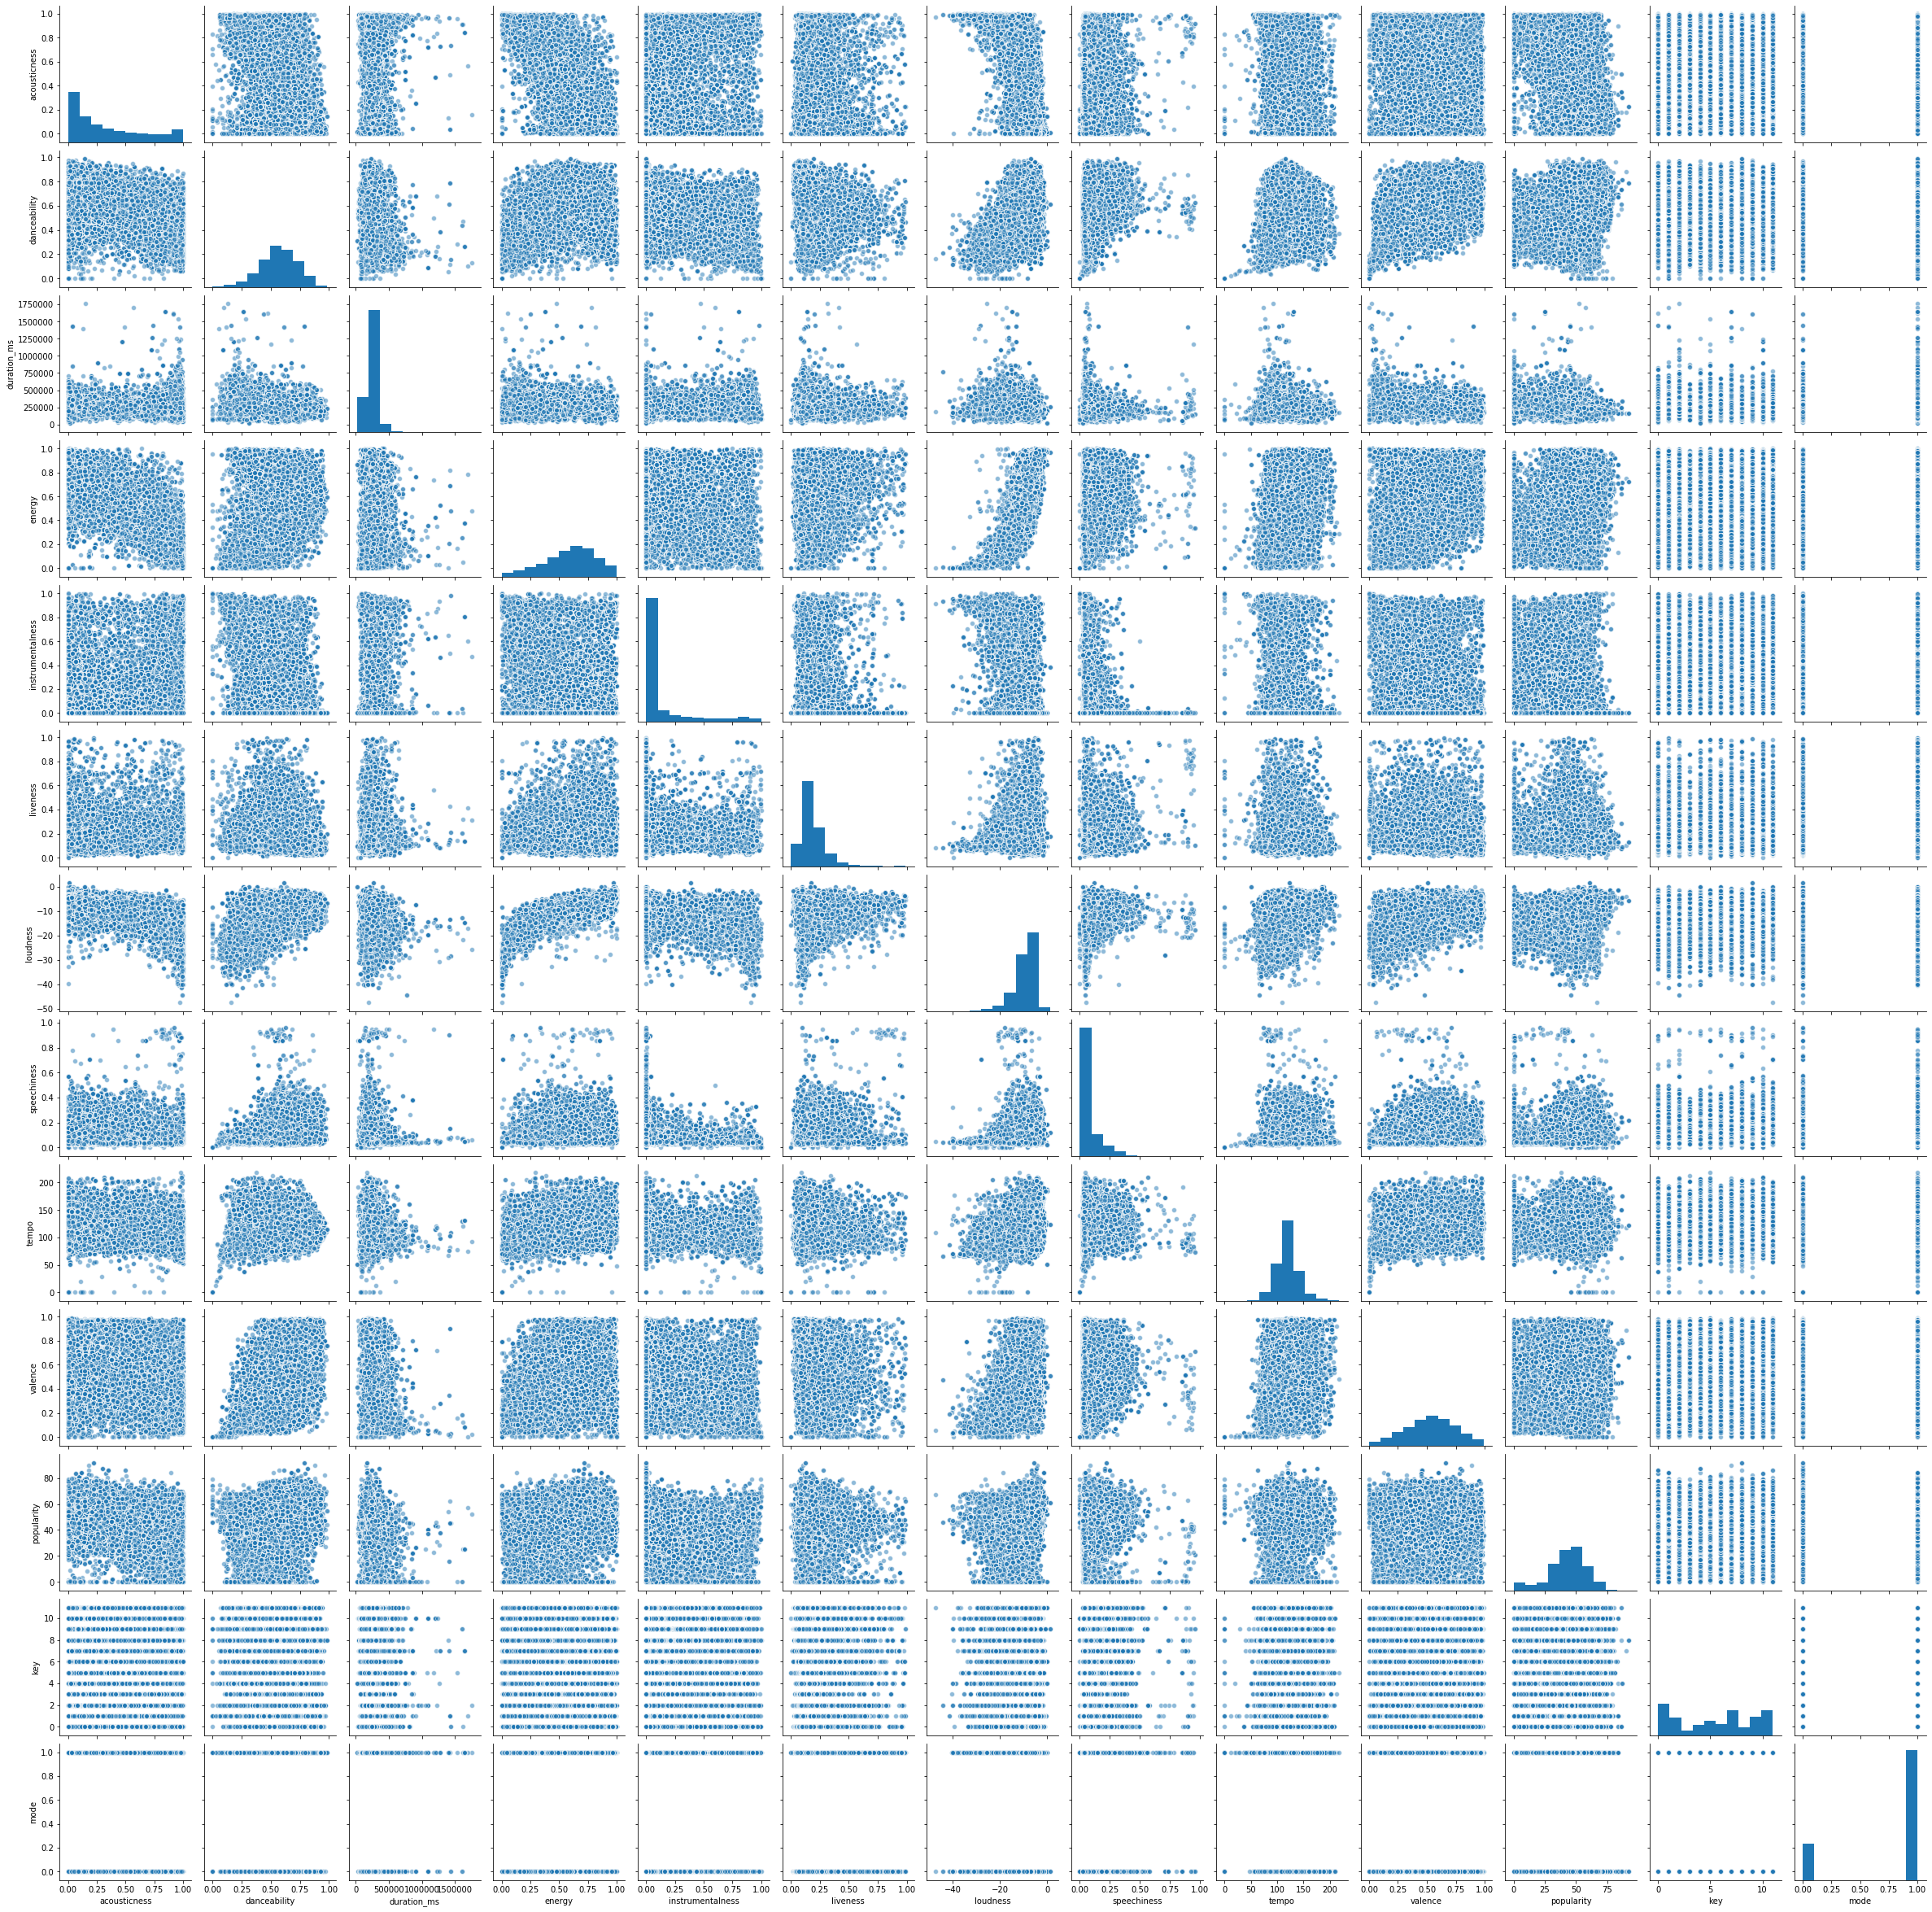

In [7]:
g = sns.PairGrid(audio_features_df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha=0.5, edgecolor="white");

# Boxplot

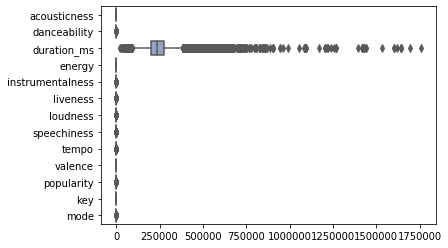

In [8]:
# Initialize the figure with a logarithmic x axis
#f, ax = plt.subplots(figsize=(10, 10))
ax = sns.boxplot(data=audio_features_df, orient="h", palette="Set2")

### Boxplots for Each Audio Feature

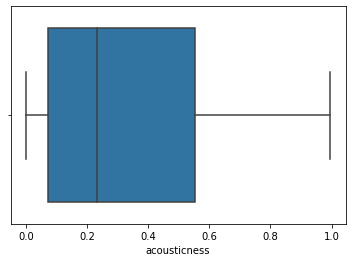

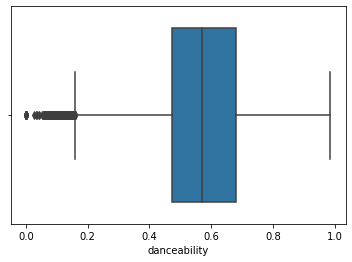

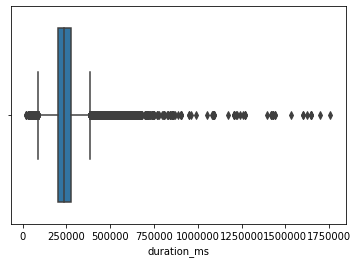

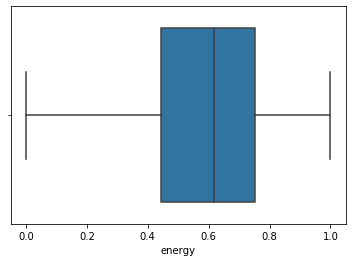

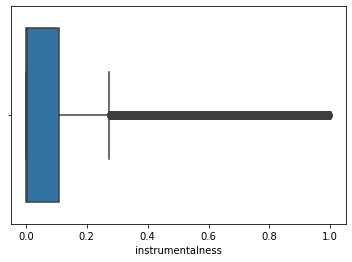

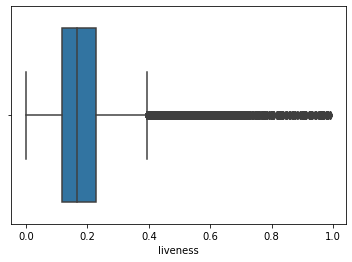

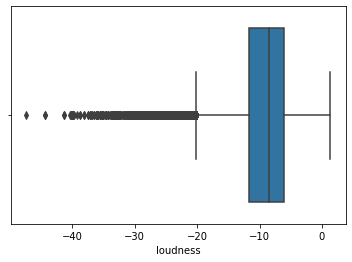

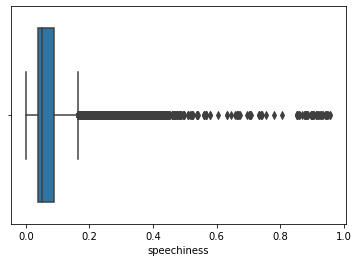

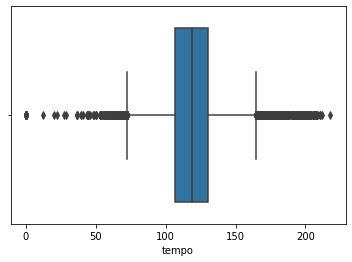

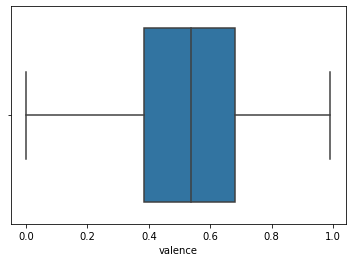

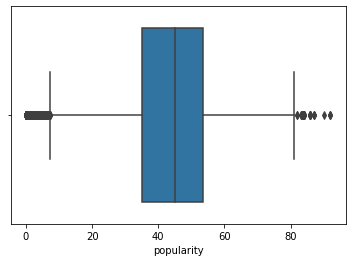

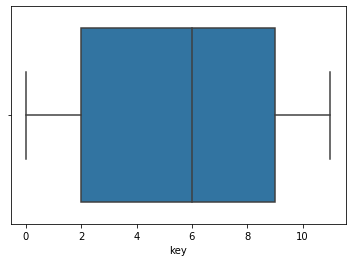

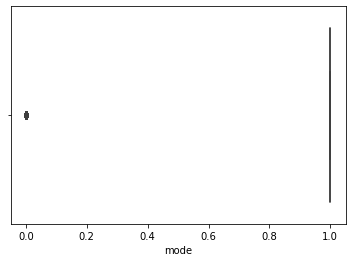

In [9]:
cols = audio_features_df.columns

for col in cols:
    sns.boxplot(x=audio_features_df[col])
    plt.show()

# Histogram

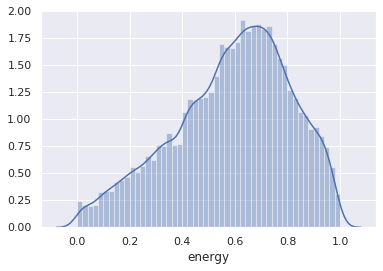

In [10]:
sns.set(color_codes=True)
sns.distplot(audio_features_df["energy"])

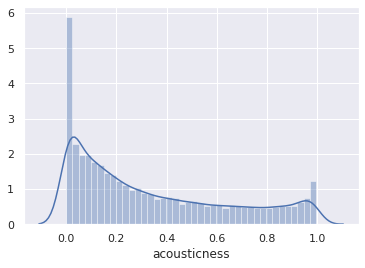

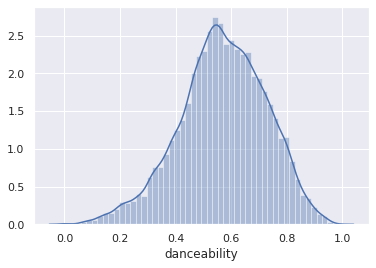

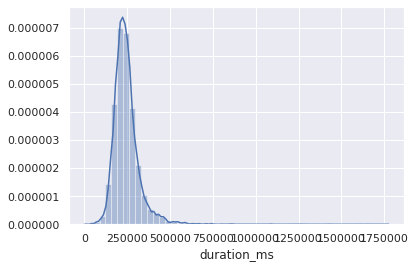

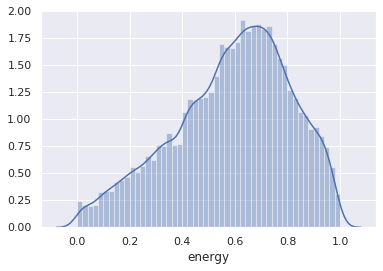

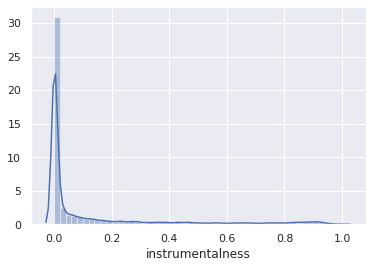

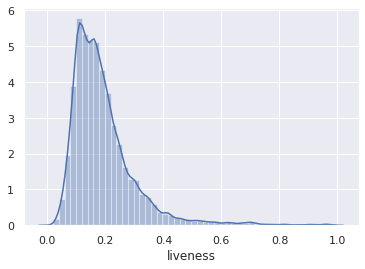

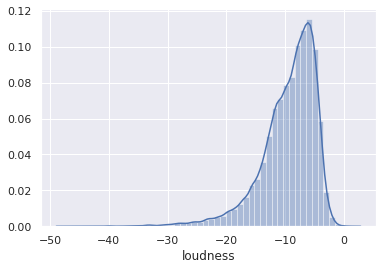

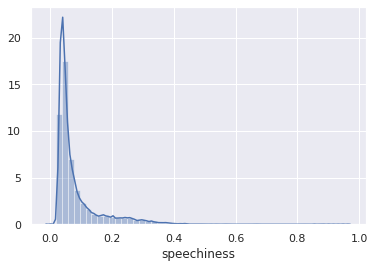

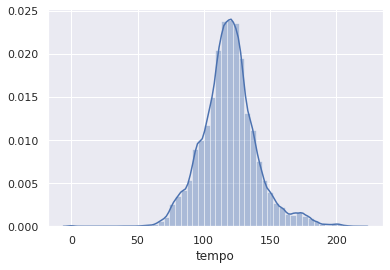

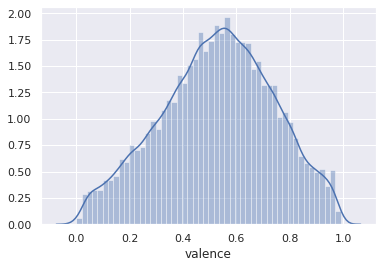

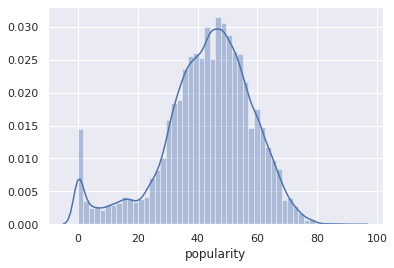

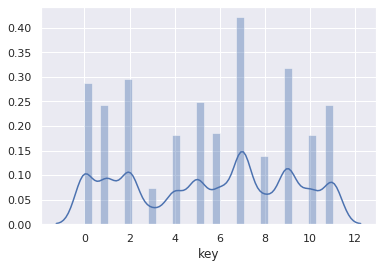

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

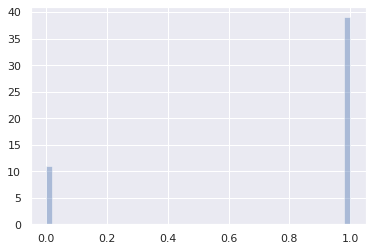

In [11]:
for col in audio_features_df.columns:
    sns.distplot(audio_features_df[col])
    plt.show()

# Correlations

### Positive Correlations:
- Enegy & Loudness: (0.81)
- Danceability & Valence: (0.55)
- Popularity & Loudness (0.45)

### Negative Correlations:
- Acousticness & Energy (-0.8)
- Acousticness & Loudness (-0.66)
- Acousticness & Popularity (-0.46)
- Instrumentalness & Loudness (-0.48)

In [12]:
# corrs=audio_features_df.corr()

# plt.figure(figsize=(20,15))
# sns.heatmap(corrs,cmap="PRGn", annot=True)
# plt.show()

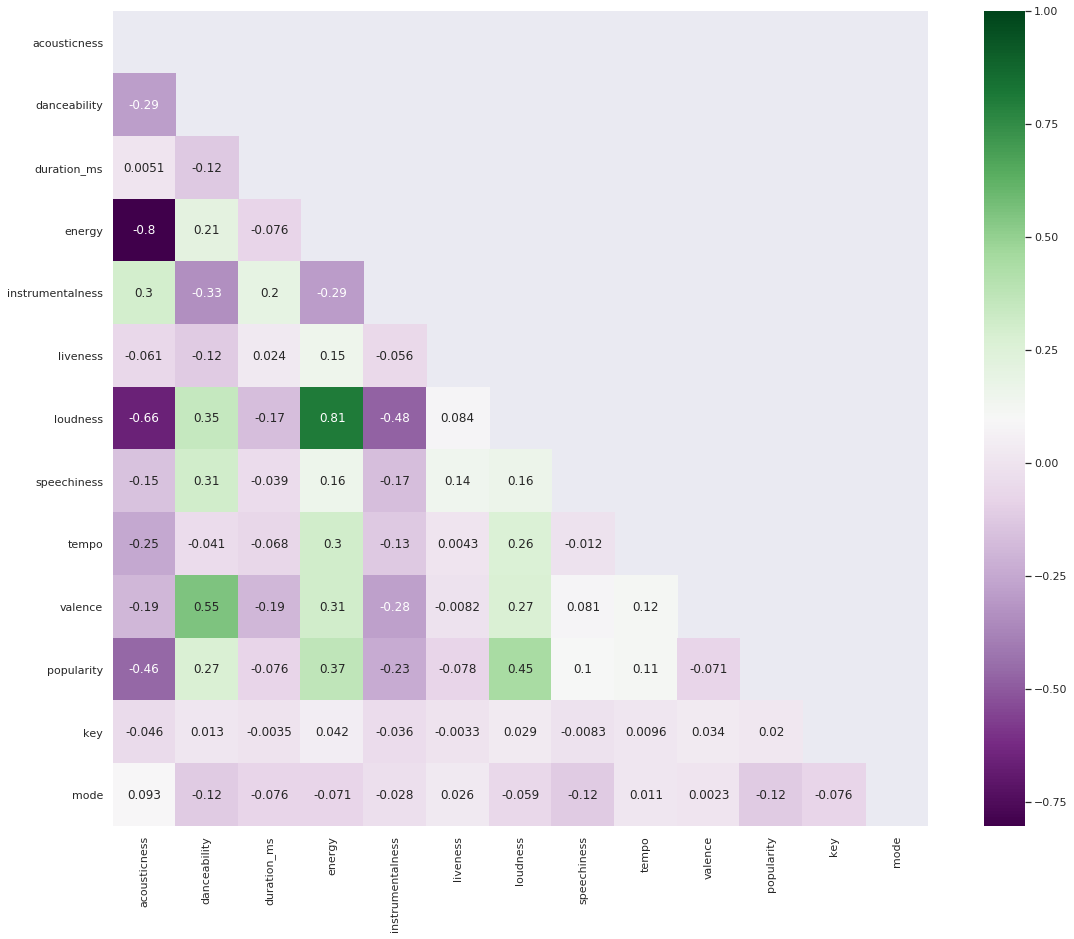

In [13]:
corrs=audio_features_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrs, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrs, mask=mask, cmap="PRGn", square=True, annot=True)
plt.show()